# 福州大学教务处教学通知分析报告

## 部门统计及其占比

部门统计：
发布部门
【教学运行】    1628
【实践科】      946
【教研教改】     480
【质量办】      362
【综合科】      287
【计划科】      199
【教学通知】      66
【教材中心】      65
Name: count, dtype: int64

部门占比：
发布部门
【教学运行】    40.366972
【实践科】     23.456484
【教研教改】    11.901810
【质量办】      8.975948
【综合科】      7.116291
【计划科】      4.934292
【教学通知】     1.636499
【教材中心】     1.611703
Name: count, dtype: float64


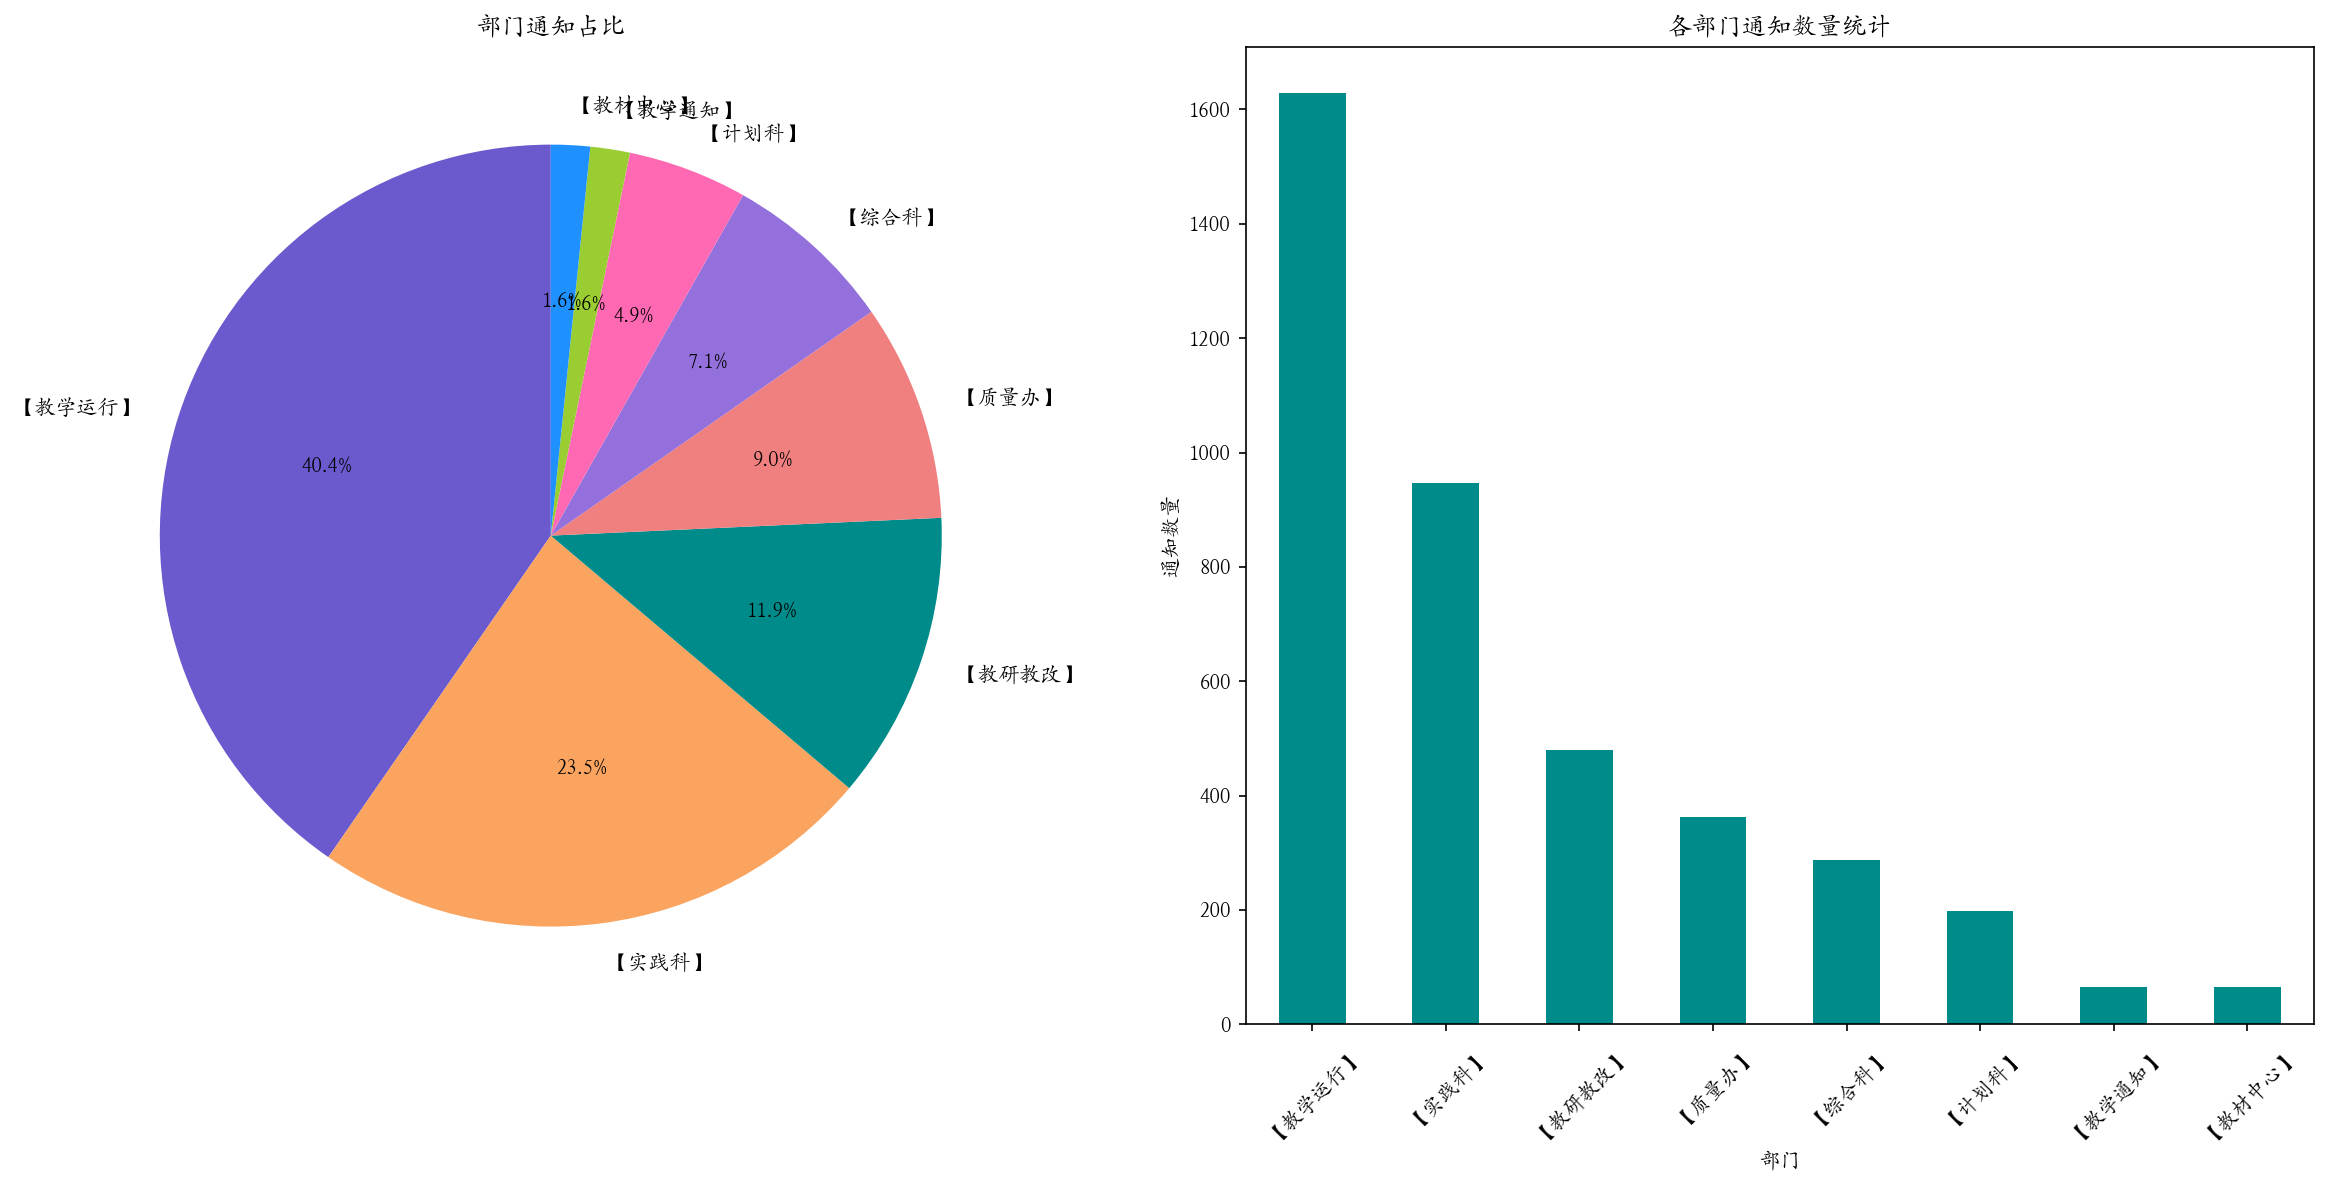

In [10]:
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency


plt.rcParams['font.sans-serif'] = ['Kai']  
plt.rcParams['axes.unicode_minus'] = False      # 正常显示负号

df = pd.read_csv('/Users/zhangyifeng/Desktop/getup-zyhtask2/notifications.csv')

subset_df = df.iloc[1:4034]

# 统计部门数量
department_counts = subset_df['发布部门'].value_counts()

# 计算部门占比
department_percentages = (department_counts / len(subset_df)) * 100

# 打印结果
print("部门统计：")
print(department_counts)
print("\n部门占比：")
print(department_percentages)

# 创建figure，设置子图
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=150)  # 1 行 2 列的子图布局

# 绘制饼图（左侧子图）
department_counts.plot.pie(
    ax=axes[0],  
    autopct='%1.1f%%',  # 显示百分比
    startangle=90,      # 起始角度
    legend=False,       # 不显示图例
    title="部门通知占比",  # 中文标题
    colors=['#6A5ACD', '#FAA460', '#008B8B', '#F08080', '#9370DB', '#FF69B4','#9ACD32','#1E90FF']
)
axes[0].set_ylabel('')  # 去掉默认的 y 轴标签

# 绘制柱状图（右侧子图）
department_counts.plot.bar(
    ax=axes[1],         # 指定子图
    color='#008B8B',     # 设置柱状图颜色
    title="各部门通知数量统计",  # 中文标题
)
axes[1].set_xlabel("部门")         # x 轴标签
axes[1].set_ylabel("通知数量")      # y 轴标签
axes[1].tick_params(axis='x', rotation=45)  # 旋转 x 轴刻度标签

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 清理
df['下载次数'] = pd.to_numeric(df['下载次数'], errors='coerce')  # df[]是series数据，将下载次数转为int,NaN
df_cleaned = df.dropna(subset=['下载次数']).copy()  #清洗掉没有数据的注意此处创建独立副本，因为后面对一个切面后的副本进行修改（添加了一列），Pandas 不能保证修改会同步到原始数据或完全独立，可能会引发意外结果。

department_stats = df_cleaned.groupby('发布部门')['下载次数'].agg(['mean', 'sum', 'count']).reset_index()#注意，.groupby后会将发布部门作为层级索引
department_stats.columns = ['发布部门', '平均下载次数', '总下载次数', '通知数量']

# 打印结果
print(department_stats)

# 部门标签编码（将分类变量转为数值变量），有时可以方便操作


     发布部门       平均下载次数     总下载次数  通知数量
0   【实践科】  1549.601732  357958.0   231
1  【教学运行】  1023.217949  159622.0   156
2  【教学通知】   537.409091   11823.0    22
3  【教材中心】   575.785714   32244.0    56
4  【教研教改】  1138.950000   91116.0    80
5   【综合科】   751.909091   16542.0    22
6   【计划科】  1555.040000   38876.0    25
7   【质量办】   808.512821   63064.0    78


In [13]:
# 计算分点
low_threshold = df_cleaned['下载次数'].quantile(0.33)
high_threshold = df_cleaned['下载次数'].quantile(0.66)

# 划分等级
def categorize_downloads(value):
    if value <= low_threshold:
        return '低'
    elif value <= high_threshold:
        return '中'
    else:
        return '高'    
df_cleaned['下载次数分类'] = df_cleaned['下载次数'].apply(categorize_downloads)#注意背后逻辑，将该操作赋给了新列，不然只是返回一个新的series列，不会对原先df修改

# 构建列联表
contingency_table = pd.crosstab(df_cleaned['发布部门'], df_cleaned['下载次数分类'])#该方法创建交叉表（列联表），交叉表 是显示两个分类变量（类别型数据）之间关系的表格，表格的每一格显示的是分类变量组合的频数。
print("列联表：")
print(contingency_table)






列联表：
下载次数分类   中   低    高
发布部门               
【实践科】   69  53  109
【教学运行】  52  63   41
【教学通知】   7  15    0
【教材中心】  11  35   10
【教研教改】  22  20   38
【综合科】   14   6    2
【计划科】    6   3   16
【质量办】   40  26   12


In [14]:

# 独立性检验
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"卡方统计量: {chi2}")
print(f"P 值: {p}")
print(f"自由度: {dof}")
print("期望频数矩阵:")
print(expected)

# 判断显著性
if p < 0.05:
    print("发布部门和下载次数分类有显著关系")
else:
    print("发布部门和下载次数分类无显著关系")

卡方统计量: 106.19373330884405
P 值: 3.0504263168744023e-16
自由度: 14
期望频数矩阵:
[[76.19552239 76.19552239 78.60895522]
 [51.45671642 51.45671642 53.08656716]
 [ 7.25671642  7.25671642  7.48656716]
 [18.47164179 18.47164179 19.05671642]
 [26.3880597  26.3880597  27.2238806 ]
 [ 7.25671642  7.25671642  7.48656716]
 [ 8.24626866  8.24626866  8.50746269]
 [25.72835821 25.72835821 26.54328358]]
发布部门和下载次数分类有显著关系


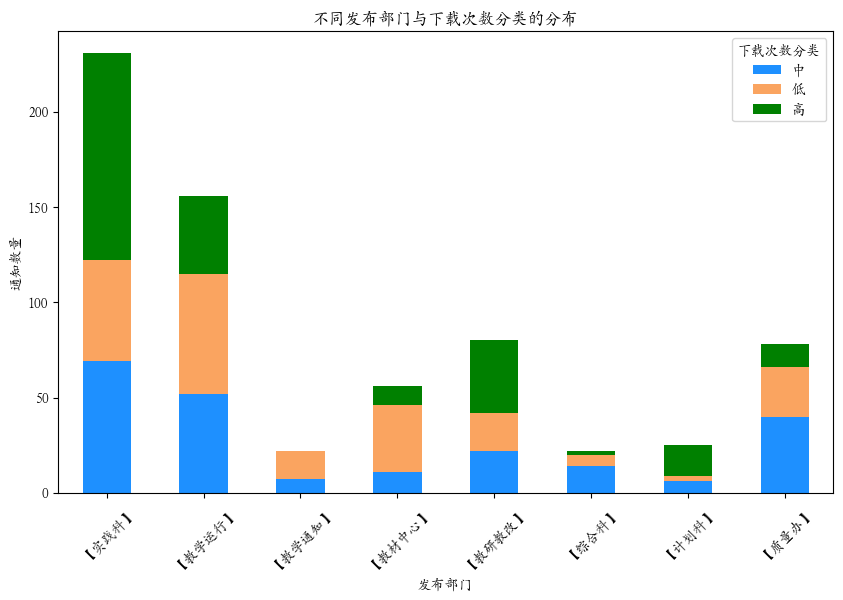

In [18]:
#可视化
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1E90FF', '#FAA460', 'green'])
plt.title('不同发布部门与下载次数分类的分布')
plt.xlabel('发布部门')
plt.xticks(rotation=45)
plt.ylabel('通知数量')
plt.legend(title='下载次数分类')
plt.show()

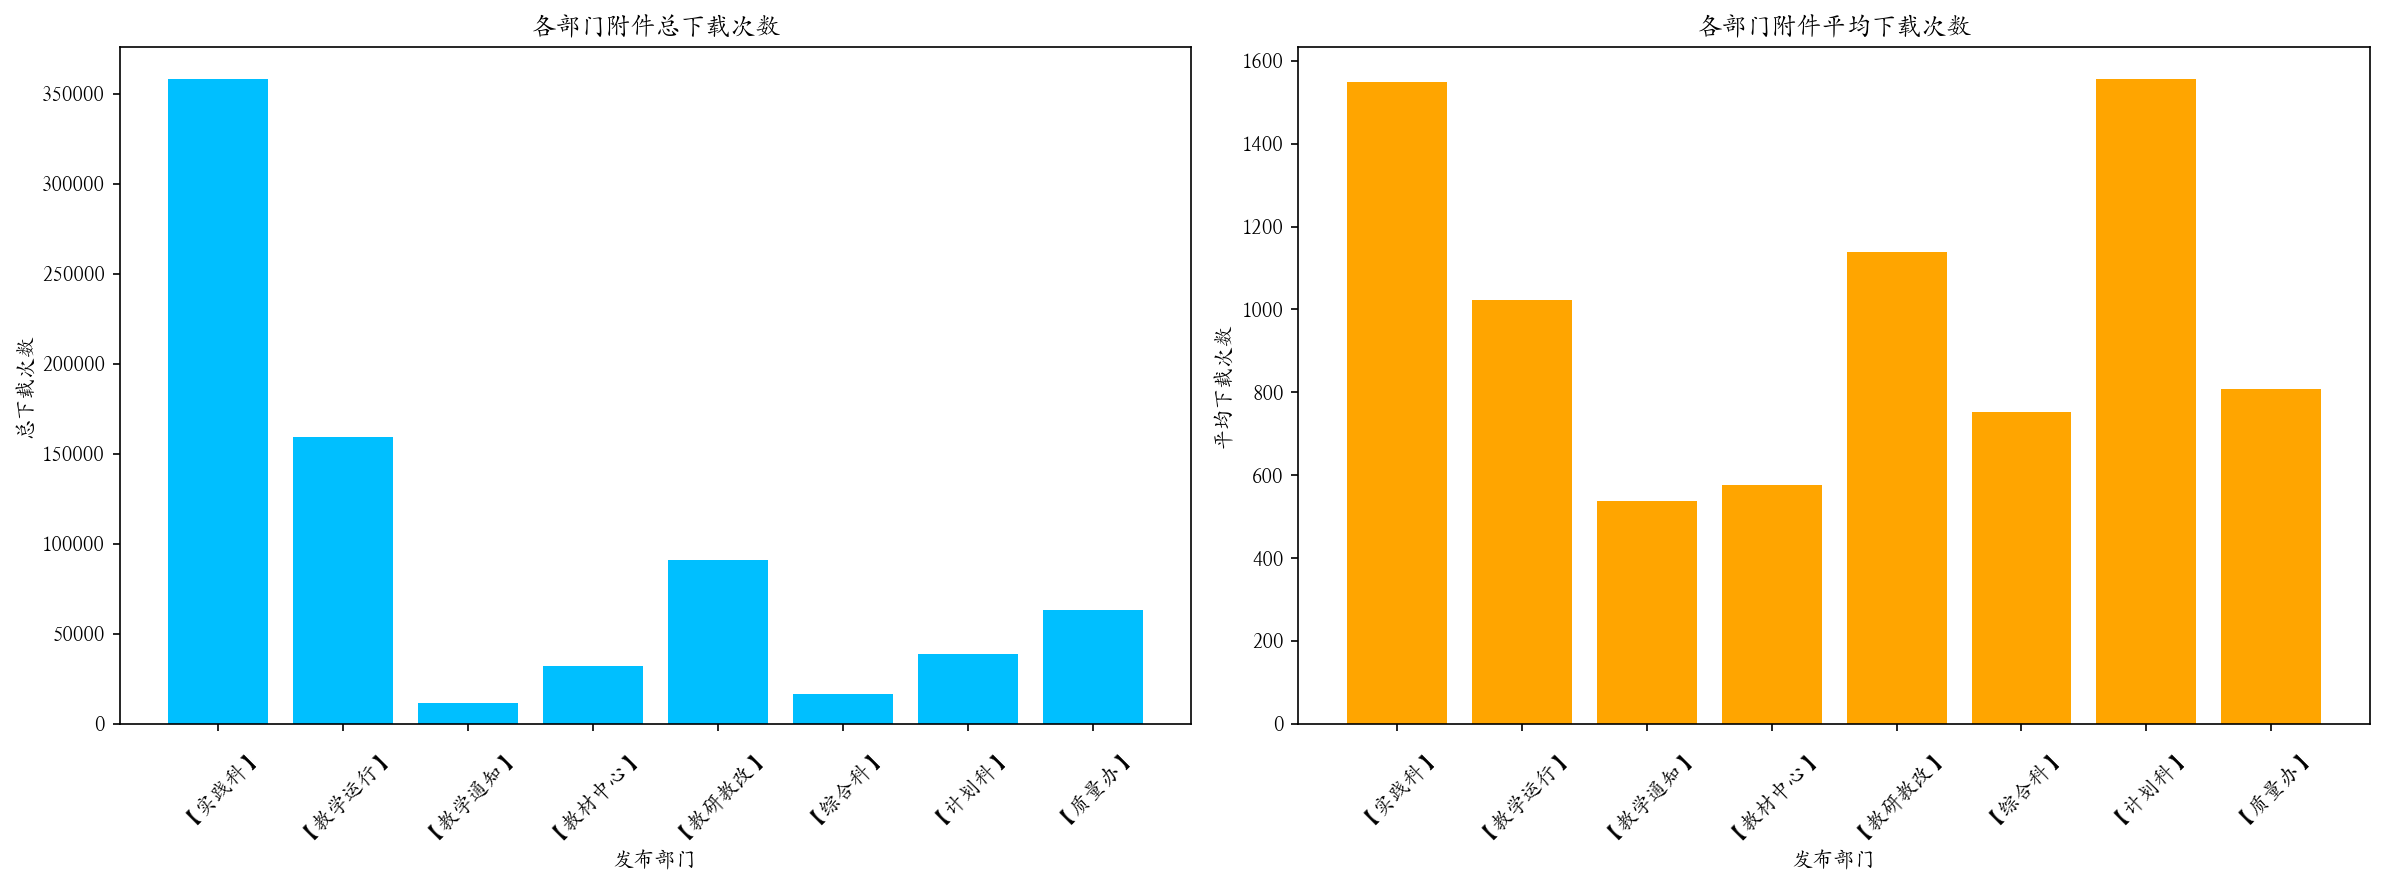

In [19]:
import matplotlib.pyplot as plt

# 创建一个figure，并设置两个子图
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=150)  # 1行2列子图布局

# 子图 1：各部门附件总下载次数
axes[0].bar(department_stats['发布部门'], department_stats['总下载次数'], color='#00BFFF')
axes[0].set_xlabel('发布部门')
axes[0].set_ylabel('总下载次数')
axes[0].set_title('各部门附件总下载次数')
axes[0].tick_params(axis='x', rotation=45)  # 旋转 x 轴刻度标签

# 子图 2：各部门附件平均下载次数
axes[1].bar(department_stats['发布部门'], department_stats['平均下载次数'], color='orange')
axes[1].set_xlabel('发布部门')
axes[1].set_ylabel('平均下载次数')
axes[1].set_title('各部门附件平均下载次数')
axes[1].tick_params(axis='x', rotation=45)  # 旋转 x 轴刻度标签

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

发布日期
2002-10-28    1
2002-11-05    1
2002-12-04    1
2003-01-20    1
2003-02-17    1
2003-03-11    1
2003-03-18    2
2003-03-24    1
2003-04-02    1
2003-04-04    1
dtype: int64


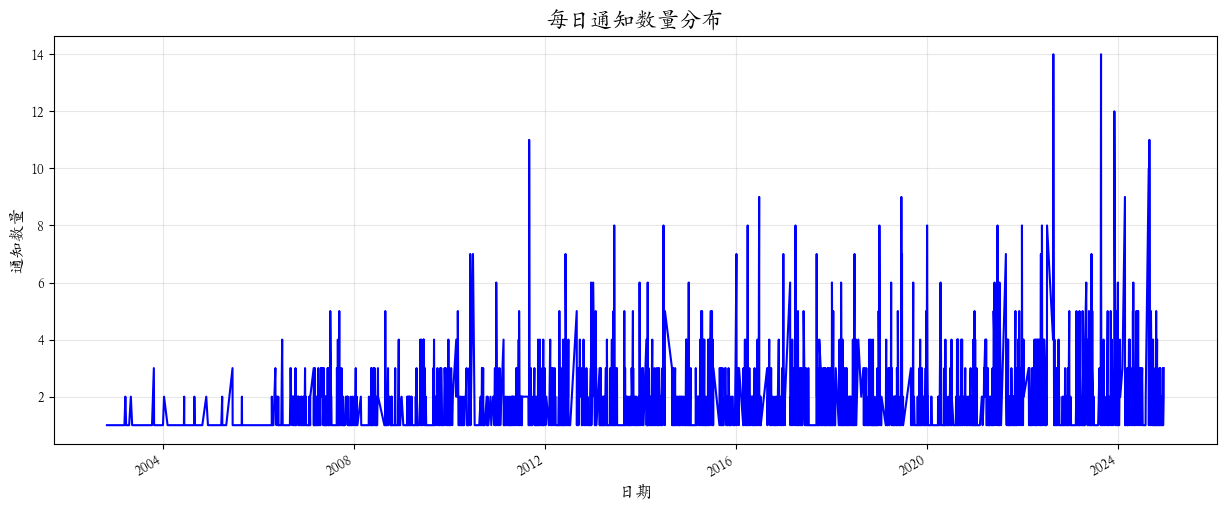

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设数据已经加载到 DataFrame df
# 确保发布日期列为日期格式
df['发布日期'] = pd.to_datetime(df['发布日期'], errors='coerce')

# 清理掉无效日期的行
df = df.dropna(subset=['发布日期'])

# 按天统计每天的通知数量
daily_notifications = df.groupby('发布日期').size()

# 打印每天的通知数量（前10天）
print(daily_notifications.head(10))

# 绘制折线图 - 每天通知数量
plt.figure(figsize=(15, 6))
daily_notifications.plot(x='发布日期',y='下载次数'  ,     kind='line', color='blue', linewidth=1.5)
plt.title('每日通知数量分布', fontsize=16)
plt.xlabel('日期', fontsize=12)
plt.ylabel('通知数量', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

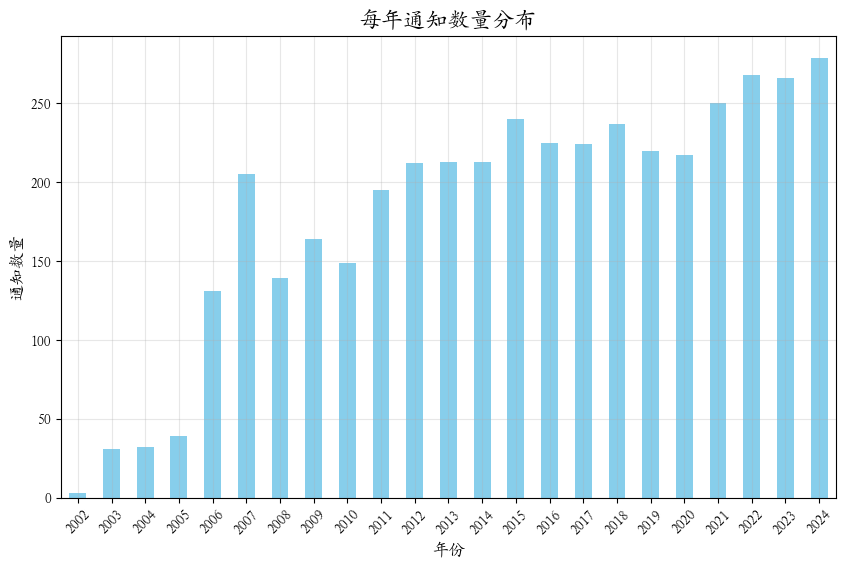

In [31]:
# 按年份统计通知数量
df['年份'] = df['发布日期'].dt.year
yearly_notifications = df.groupby('年份').size()

# 绘制柱状图 - 每年通知数量
plt.figure(figsize=(10, 6))
yearly_notifications.plot(kind='bar', color='skyblue')
plt.title('每年通知数量分布', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('通知数量', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

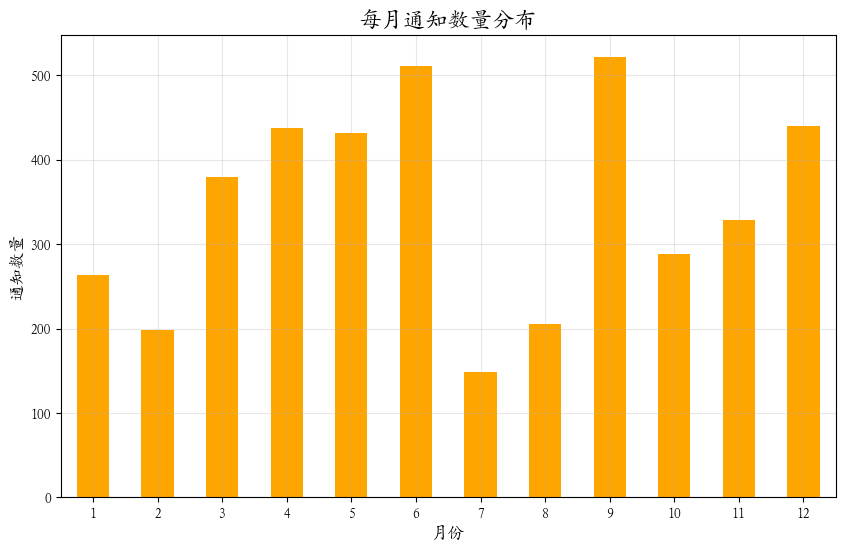

In [21]:
# 按月份统计通知数量
df['月份'] = df['发布日期'].dt.month
monthly_notifications = df.groupby('月份').size()

# 绘制柱状图 - 每月通知数量
plt.figure(figsize=(10, 6))
monthly_notifications.plot(kind='bar', color='orange')
plt.title('每月通知数量分布', fontsize=16)
plt.xlabel('月份', fontsize=12)
plt.ylabel('通知数量', fontsize=12)
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()

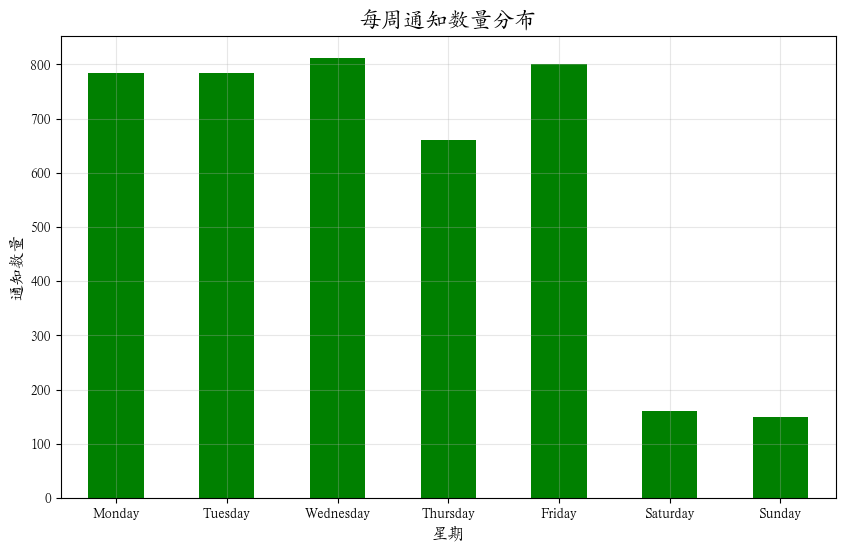

In [34]:
# 按星期几统计通知数量
df['星期几'] = df['发布日期'].dt.day_name()
weekday_notifications = df.groupby('星期几').size()

# 按星期顺序排序
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_notifications = weekday_notifications.reindex(weekday_order)

# 绘制柱状图 - 每周通知分布
plt.figure(figsize=(10, 6))
weekday_notifications.plot(kind='bar', color='green')
plt.title('每周通知数量分布', fontsize=16)
plt.xlabel('星期', fontsize=12)
plt.ylabel('通知数量', fontsize=12)
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()

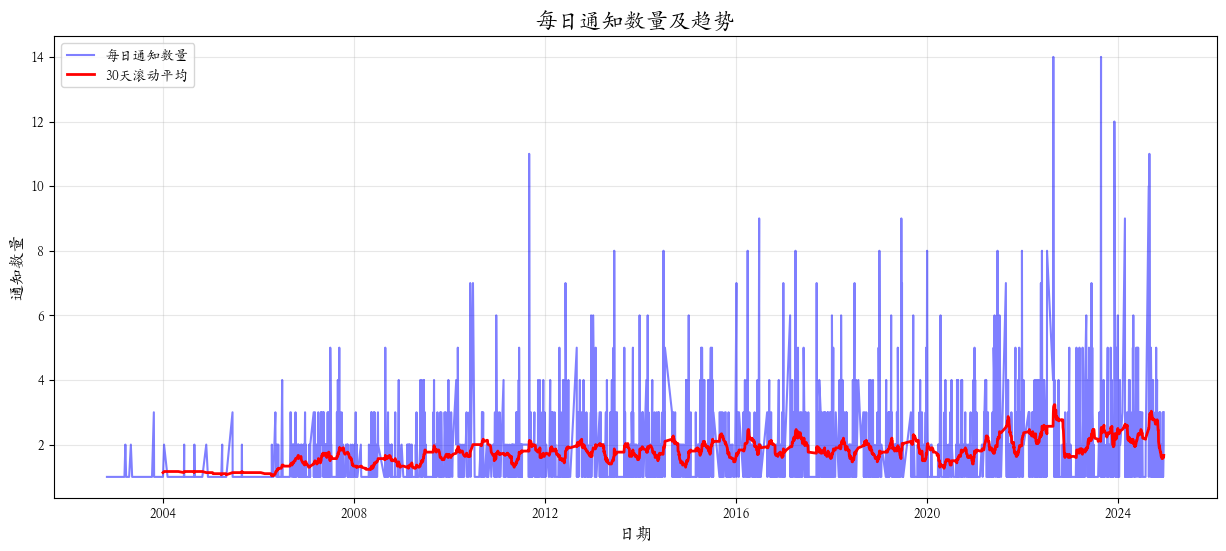

In [23]:
# 计算 30 天的滚动平均通知数量
rolling_mean = daily_notifications.rolling(window=30).mean()

# 绘制平滑后的折线图
plt.figure(figsize=(15, 6))
plt.plot(daily_notifications.index, daily_notifications, alpha=0.5, label='每日通知数量', color='blue')
plt.plot(rolling_mean.index, rolling_mean, label='30天滚动平均', color='red', linewidth=2)
plt.title('每日通知数量及趋势', fontsize=16)
plt.xlabel('日期', fontsize=12)
plt.ylabel('通知数量', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()